# **Ejercicio 1**
Contenido del dataset: Candidatos a púlsar obtenidos mediante la exploración HTRU. Los púlsares son un tipo de estrella, de considerable interés científico. Los candidatos deben estar clasificados en clases pulsar y no pulsar para facilitar el descubrimiento.
El ejercicio consiste obtener un modelo de clasificación para clasificar en pulsar (clase positiva) y no pulsar (clase negativa).
El dataset está en formato csv, contiene 8 atributos y la clase. No aparecen los nombres de los atributos en la primera línea del dataset. En el código suministrado se resuelve este problema.

*   URL: https://archive.ics.uci.edu/ml/datasets/HTRU2
*   URL Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip

**Tomando como base el ejemplo1 de los suministrados en clase**, implementar un clasificador basado en el descenso de gradiente estocástico (SGDClassifier), que contenga los siguientes apartados:
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases están desbalanceadas,
*   Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Obtener curva ROC y su área.
*   Obtener curva presición recall.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.
Utilizando el mismo dataset implementar clasificadores basados en Regresión Logística, SVM lineal y K vecinos más cercanos. Realizando

Toda la parte del descarga y preparación del dataset se suministra en este archivo.

In [123]:
import pandas as pd

In [124]:
#https://archive.ics.uci.edu/ml/datasets/HTRU2   este es bueno para usar en la práctica  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/

In [125]:
%%bash
wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
unzip HTRU2.zip -d contents

--2025-01-14 23:51:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘HTRU2.zip’

     0K .......... .......... .......... .......... ..........  123K
    50K .......... .......... .......... .......... ..........  285K
   100K .......... .......... .......... .......... ..........  188K
   150K .......... .......... .......... .......... .......... 29,3M
   200K .......... .......... .......... .......... ..........  348M
   250K .......... .......... .......... .......... ..........  248K
   300K .......... .......... .......... .......... ..........  248M
   350K .......... .......... .......... .......... ..........  289M
   400K .......... .......... .......... .......... ..........  144K
   450K .......... ..........

Archive:  HTRU2.zip
  inflating: contents/HTRU_2.csv     
  inflating: contents/HTRU_2.arff    
  inflating: contents/Readme.txt     


In [126]:
htru2 = pd.read_csv("contents/HTRU_2.csv", header = 0, names = ["MEAN_IP", "SD_IP", "EK_IP", "S_IP", "MEAN_DN-SNR", "SD_DM-SNR", "EK_DM-SNR", "S_DM-SNR", "label"])
#Para añadir nombres a los atributos cuando no aparecen en el archivo csv

In [127]:
htru2.head()

,MEAN_IP,SD_IP,EK_IP,S_IP,MEAN_DN-SNR,SD_DM-SNR,EK_DM-SNR,S_DM-SNR,label
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [128]:
htru2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MEAN_IP      17897 non-null  float64
 1   SD_IP        17897 non-null  float64
 2   EK_IP        17897 non-null  float64
 3   S_IP         17897 non-null  float64
 4   MEAN_DN-SNR  17897 non-null  float64
 5   SD_DM-SNR    17897 non-null  float64
 6   EK_DM-SNR    17897 non-null  float64
 7   S_DM-SNR     17897 non-null  float64
 8   label        17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [129]:
htru2_labels = htru2["label"] #Guardamos etiquetas aparte

In [130]:
htru2_data = htru2.drop("label", axis = 1) #Eliminamos la etiqueta

In [131]:
htru2_labels = (htru2_labels == 1) #Cambiamos la etiqueta/clase de 0/1 a True/False

In [132]:
htru2_labels.head()

0    False
1    False
2    False
3    False
4    False
Name: label, dtype: bool

In [133]:
htru2_labels.value_counts() #Como se puede ver, las clases están desbalanceadas y habrá que tenerlo en cuenta

label
False    16258
True      1639
Name: count, dtype: int64

# Tarea

## Preparar el entorno y dataset

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score,
    precision_recall_curve, auc
)
import matplotlib.pyplot as plt

In [135]:
X_train, X_test, y_train, y_test = train_test_split(htru2_data, htru2_labels, test_size=0.3, stratify=htru2_labels, random_state=42)

## Clasificador SGD con Pipeline

Matriz de Confusión (SGD):
 [[4860   18]
 [ 111  381]]

Reporte de Clasificación (SGD):
               precision    recall  f1-score   support

       False       0.98      1.00      0.99      4878
        True       0.95      0.77      0.86       492

    accuracy                           0.98      5370
   macro avg       0.97      0.89      0.92      5370
weighted avg       0.98      0.98      0.97      5370

ROC-AUC Score (SGD): 0.9670


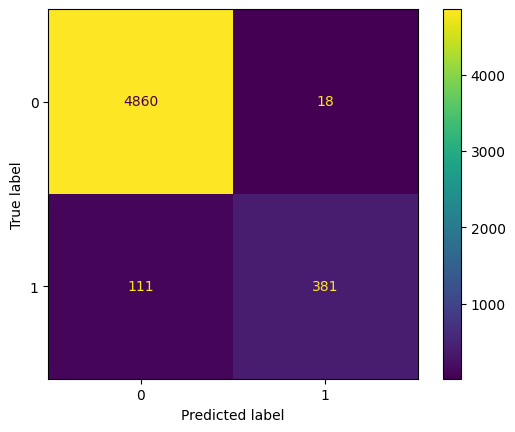

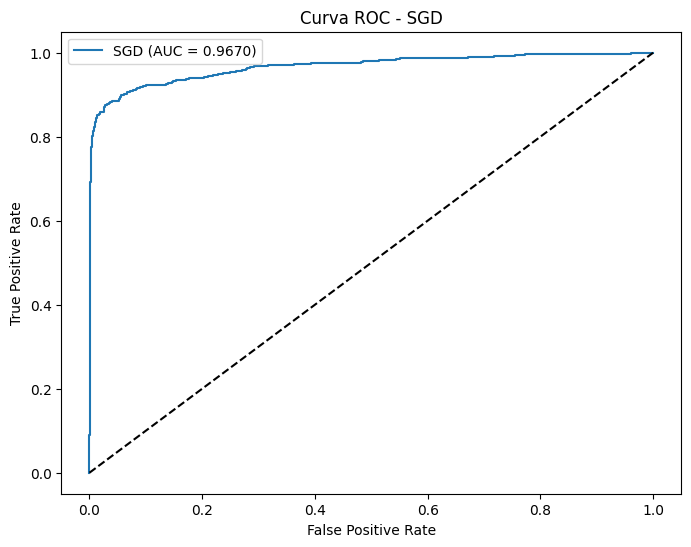

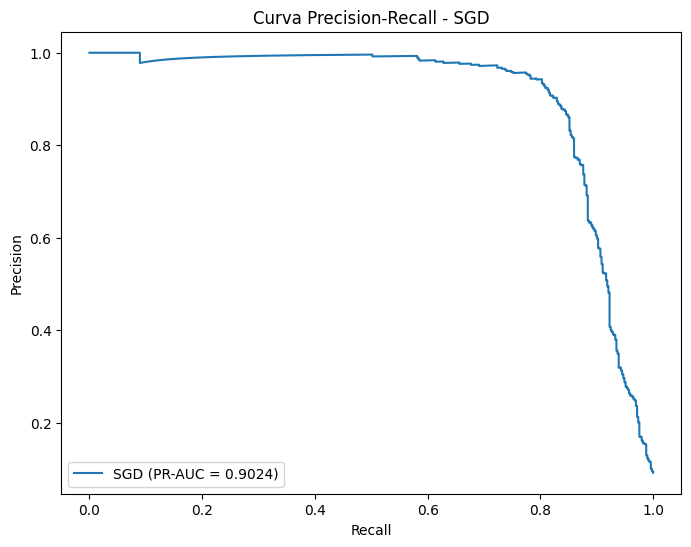

In [136]:
# Crear el pipeline con StandardScaler y SGDClassifier
sgd_pipeline = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))
sgd_pipeline.fit(X_train, y_train)

# Predicciones
y_pred_sgd = sgd_pipeline.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_sgd)
print("Matriz de Confusión (SGD):\n", conf_matrix)
ConfusionMatrixDisplay(conf_matrix).plot()

# Métricas de rendimiento
print("\nReporte de Clasificación (SGD):\n", classification_report(y_test, y_pred_sgd))

# Métrica ROC-AUC
roc_auc = roc_auc_score(y_test, sgd_pipeline.decision_function(X_test))
print(f"ROC-AUC Score (SGD): {roc_auc:.4f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, sgd_pipeline.decision_function(X_test))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SGD (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - SGD")
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, sgd_pipeline.decision_function(X_test))
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"SGD (PR-AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - SGD")
plt.legend()
plt.show()


## Otros clasificadores


Clasificador: Logistic Regression
Matriz de Confusión:
 [[4846   32]
 [  90  402]]
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99      4878
        True       0.93      0.82      0.87       492

    accuracy                           0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



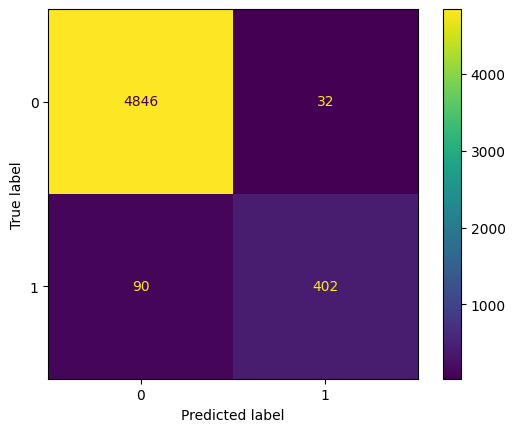

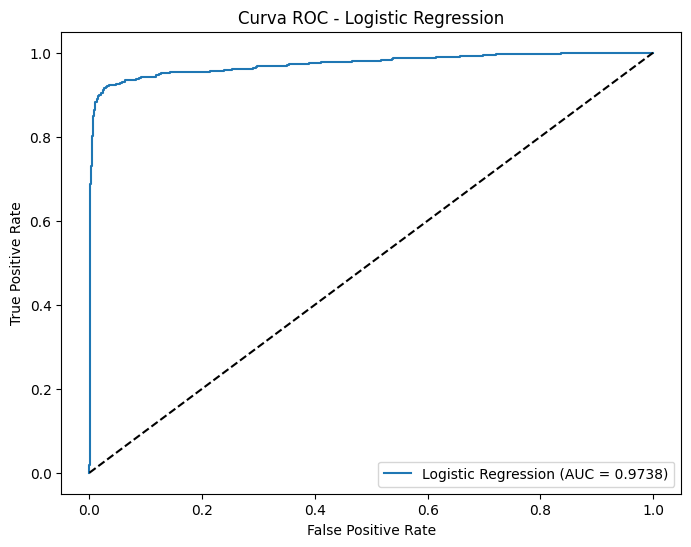

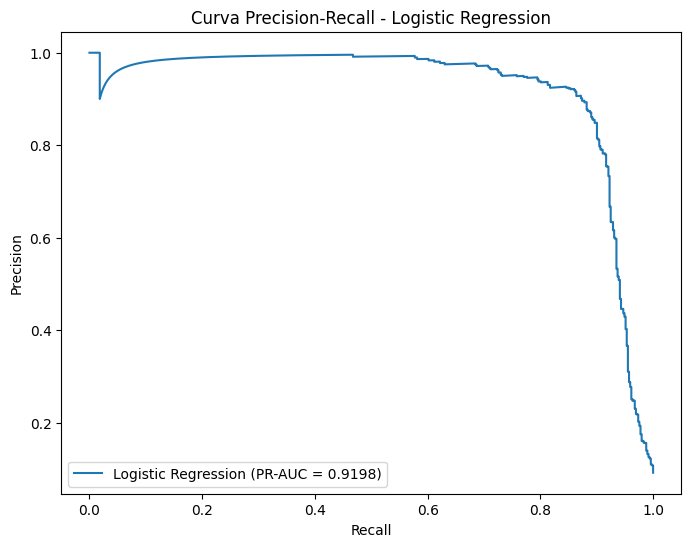


Clasificador: SVM (Lineal)
Matriz de Confusión:
 [[4851   27]
 [  93  399]]
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99      4878
        True       0.94      0.81      0.87       492

    accuracy                           0.98      5370
   macro avg       0.96      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370



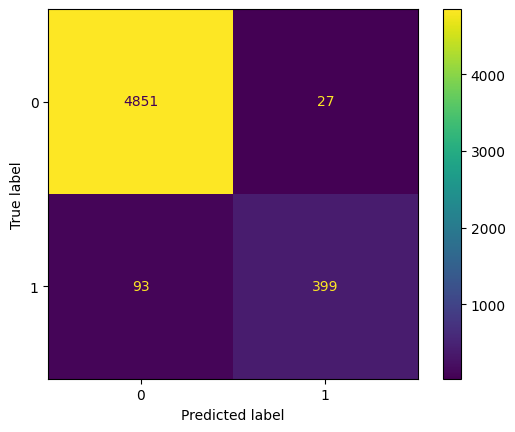

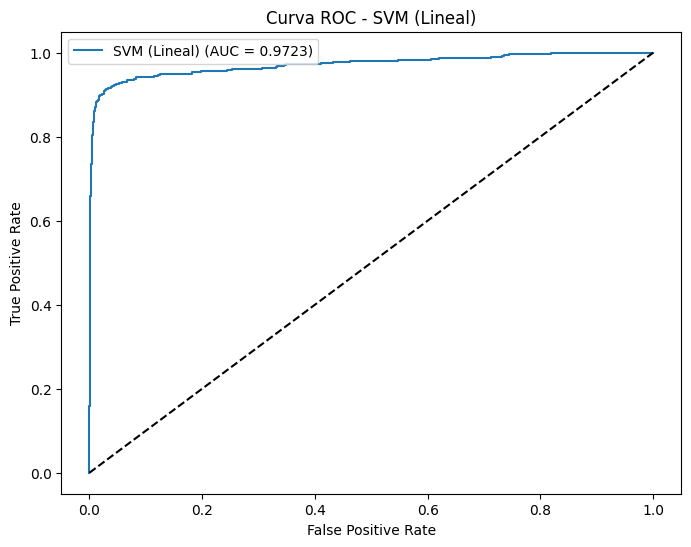

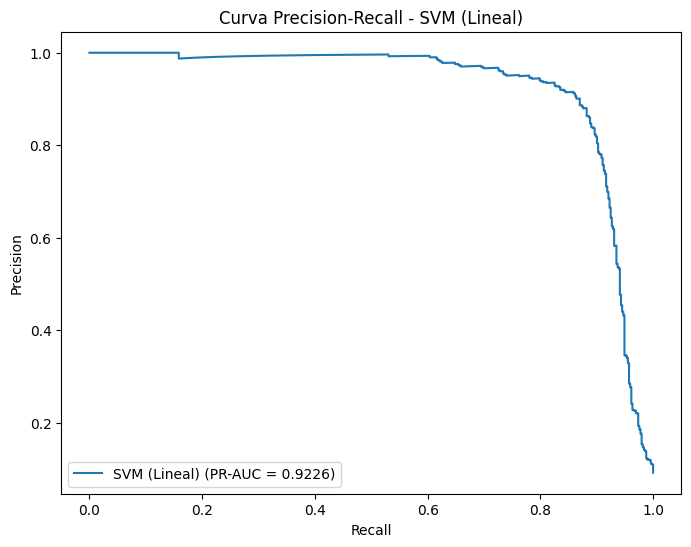


Clasificador: K-Neighbors
Matriz de Confusión:
 [[4843   35]
 [  76  416]]
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99      4878
        True       0.92      0.85      0.88       492

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370



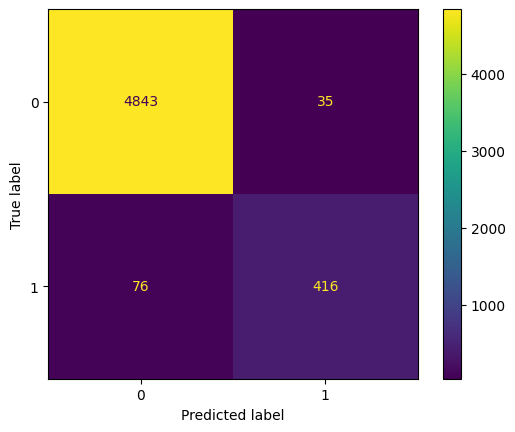

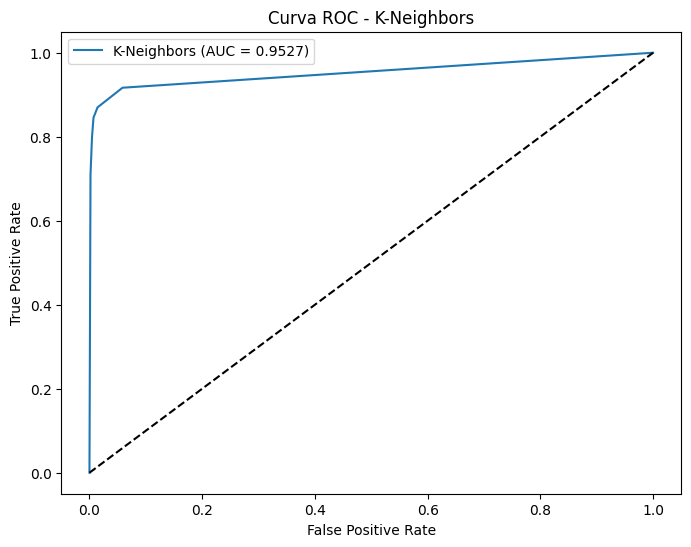

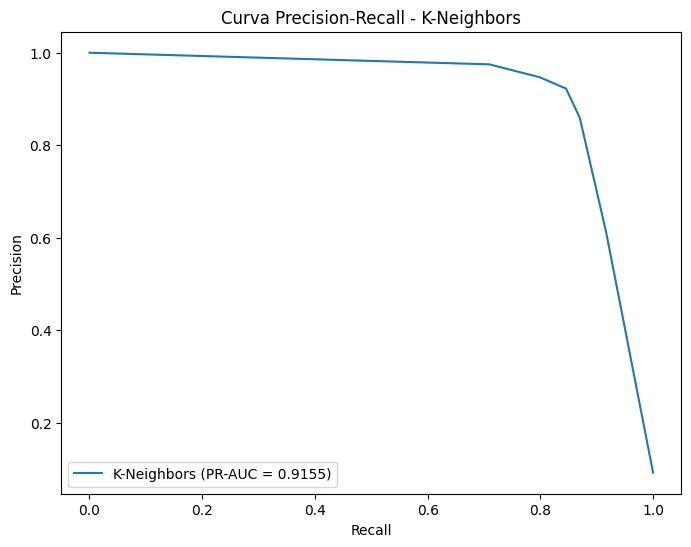

In [137]:
# Lista de clasificadores a usar
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM (Lineal)": SVC(kernel='linear', probability=True, random_state=42),
    "K-Neighbors": KNeighborsClassifier()
}

# Evaluación de cada clasificador
for name, clf in classifiers.items():
    # Crear pipeline
    pipeline = make_pipeline(StandardScaler(), clf)
    pipeline.fit(X_train, y_train)

    # Predicciones
    y_pred = pipeline.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    # Métricas de rendimiento
    print(f"\nClasificador: {name}")
    print("Matriz de Confusión:\n", conf_matrix)
    ConfusionMatrixDisplay(conf_matrix).plot()
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

    # Curva ROC
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC - {name}")
    plt.legend()
    plt.show()

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"{name} (PR-AUC = {pr_auc:.4f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Curva Precision-Recall - {name}")
    plt.legend()
    plt.show()


## Clean Workspace

In [138]:
%%bash
rm -r contents/ HTRU2.zip

# Resumen del Notebook

## Preparación del Dataset
1. **Carga del Dataset**: Se descargó y descomprimió el dataset desde la URL proporcionada.
2. **Lectura del Dataset**: Se leyó el archivo CSV y se asignaron nombres a las columnas.
3. **Exploración del Dataset**: Se realizó una exploración inicial del dataset para entender su estructura y contenido.
4. **Separación de Etiquetas**: Se separaron las etiquetas (clase) del resto de los atributos.
5. **Conversión de Etiquetas**: Se convirtieron las etiquetas de 0/1 a False/True para facilitar el manejo.

## Preparación del Entorno
1. **Importación de Librerías**: Se importaron las librerías necesarias para el análisis y modelado.
2. **División del Dataset**: Se dividió el dataset en conjuntos de entrenamiento y prueba utilizando `train_test_split` con la opción `stratify` debido al desbalanceo de clases.

## Implementación de Modelos
1. **Clasificador SGD con Pipeline**:
    - Se creó un pipeline que incluye `StandardScaler` y `SGDClassifier`.
    - Se entrenó el modelo y se realizaron predicciones.
    - Se evaluó el modelo utilizando la matriz de confusión, reporte de clasificación, curva ROC y curva Precision-Recall.

2. **Otros Clasificadores**:
    - Se implementaron y evaluaron otros clasificadores: Regresión Logística, SVM Lineal y K-Vecinos.
    - Para cada clasificador, se creó un pipeline, se entrenó el modelo y se realizaron predicciones.
    - Se evaluaron los modelos utilizando las mismas métricas que para el clasificador SGD.

## Resultados
- **Matriz de Confusión**: Se obtuvo la matriz de confusión para cada modelo, mostrando el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
- **Reporte de Clasificación**: Se generó un reporte de clasificación para cada modelo, incluyendo métricas como precisión, recall, f1-score y accuracy.
- **Curva ROC y AUC**: Se trazó la curva ROC y se calculó el área bajo la curva (AUC) para cada modelo.
- **Curva Precision-Recall**: Se trazó la curva Precision-Recall y se calculó el área bajo la curva (PR-AUC) para cada modelo.